# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 110,527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The dataset has 14 columns of characteristics about the patient. The columns are

● *PatientId* - a unique identification for each patient

● *AppointmentID* - a unique identification for each set appointment

● *Gender* - patient's gender

● *ScheduledDay* - the day the patient set up their appointment

● *AppointmentDay* - day Date of appointment

● *Age* - Age of the patient

● *Neighbourhood* - indicates the location of the hospital

● *Scholarship* -  indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família

● *Hipertension* - indicates if patient is hypertensive

● *Diabetes* - indicates if patient has diabetes

● *Alcoholism* - indicates if patient consumes alcohol

● *Handcap*- indicates if patient is handicap

● *SMS_received* - indicates if patient recieves any sms

● *No-show* - the target, indicates is patient shows up. (‘No’ if the patient showed up to their appointment, and ‘Yes’ if they
did not show up.)

### Question(s) for Analysis

* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
* Which Top 5 neighbourhoods as highest No-show?
* What is the likelihood of young patients Not Show-Up?
* Is there any relationship between age; hipertension, diabetes, and handicap?

In [1]:
#importing necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### Load Data

In [3]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [4]:
#checking the first rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#the rows and columns of data
df.shape

(110527, 14)

In [6]:
#columns name
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
#checking for missing values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#the number of duplicates in data
df.duplicated().sum()

0

In [9]:
#number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
#the unique values in the suppose categorical variables
[(x, df[x].unique()) for x in df.columns if df[x].nunique() < 10 ]

[('Gender', array(['F', 'M'], dtype=object)),
 ('Scholarship', array([0, 1])),
 ('Hipertension', array([1, 0])),
 ('Diabetes', array([0, 1])),
 ('Alcoholism', array([0, 1])),
 ('Handcap', array([0, 1, 2, 3, 4])),
 ('SMS_received', array([0, 1])),
 ('No-show', array(['No', 'Yes'], dtype=object))]

In [11]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

`ScheduledDay` and `AppointmentDay` columns are not in the right data types of datetime. The `No-show` column will be renamed to `Show-Up` and it values also changed. Also the `Hipertension`and `Handcap` column spelling will be corrected.


### Data Cleaning
 

In [12]:
#renaming the columns intuitively
df.rename(columns={'No-show':'Show_up', 'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap'}, inplace =True)

#### Changing Show_Up Yes to Yes & No to No

In [13]:
#before change
df['Show_up'].value_counts()

No     88208
Yes    22319
Name: Show_up, dtype: int64

In [14]:
#making the column more intutive
#changed the response to proper positive and negative format

df['Show_up'].replace(['Yes', 'No'], [1, 2], inplace = True)
df['Show_up'].replace([1, 2], ['No', 'Yes'], inplace = True)

df['Show_up'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
#after change
df['Show_up'].value_counts()

Yes    88208
No     22319
Name: Show_up, dtype: int64

### Changing to the right dtype

In [16]:
#converted columns to the right dtypes
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [17]:
#confirmation
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
Show_up                   object
dtype: object

In [18]:
#showing changes
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


### Checking and Handling Outliers

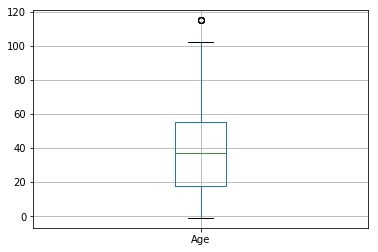

In [19]:
#checking if there is any outlier
df[['Age']].boxplot();

In [20]:
#a negative value for age
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_up
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,Yes


In [21]:
#The row with negative value is dropped
df.drop(99832, inplace =  True)

<a id='eda'></a>
## Exploratory Data Analysis


In [22]:
#statistical descriptin of the numeric data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


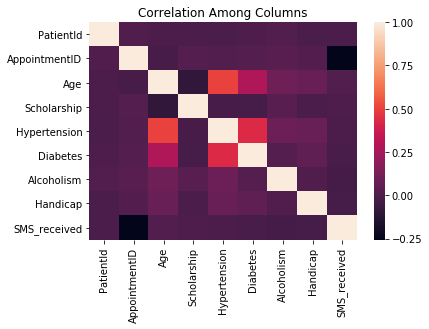

In [23]:
#showing the level of correlation among the columns
sns.heatmap(df.corr());
plt.title('Correlation Among Columns');

There is a visible positive correlation between Age, Hypertension and Diabetes.

In [24]:
#splitting the data to Yes and No
Yes_show = df.query('Show_up == "Yes"').reset_index(drop = True)
No_show = df.query('Show_up == "No"').reset_index(drop = True)

len(Yes_show) + len(No_show) == len(df)

True

In [25]:
#first few rows
Yes_show.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes


In [26]:
#first few rows
No_show.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_up
0,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,No
1,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,No
2,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,No


In [27]:
#count of show_up against no_show
df['Show_up'].value_counts()

Yes    88207
No     22319
Name: Show_up, dtype: int64

In [1]:
import pandas as pd

In [ ]:
pd.read_csv()

In [28]:
#functions to plot
def plot_count(col, title, hue_col = 'Show_up', data = df):
    """
    Plots a Countplot for the column given
    
    Parameters
    ----------
    col : str, a column in the data
    
    title : str, string to be displaced as plot title
    
    hue_col : str, default ``Show_up``
            Column name to be used as hue in plot
    data : data frame, default df
        The name of the data to read the columns from
    """
    
    sns.countplot(x = col, data = data, hue = hue_col)
    plt.title(title);
    
#hist plot
def plot_hist(col, title):
    """
    Plots a Histogram for the column given with title
    
    Parameters
    ----------
    col : str, a column in the data
    
    title : str, string to be displaced as plot title
    
    """
    plt.hist(Yes_show[col], alpha = 0.5, label = 'Yes')
    plt.hist(No_show[col], alpha = 0.5, label = 'No')
    plt.legend()
    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel(col.title())

## What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### Gender

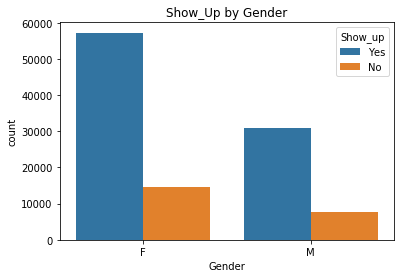

In [29]:
#Show up with Gender
plot_count('Gender', title = 'Show_Up by Gender')

In [30]:
#average Female Show up
(Yes_show['Gender'] == 'F').sum() / (df['Gender'] == 'F').sum()

0.79685129247344755

In [31]:
#average Male Show up
(Yes_show['Gender'] == 'M').sum() / (df['Gender'] == 'M').sum()

0.80032052110528085

Considering the data Women are more likely to show up than Men generally. But comparing each gender population approximately both gender has 80% chance of showing up.

### Age

In [32]:
#description of patients who Show-up
Yes_show['Age'].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [33]:
#description of patients who did not Show-up
No_show['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

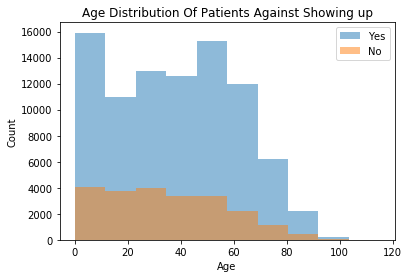

In [34]:
#plotting the histogram
plot_hist(col = 'Age', title = 'Age Distribution Of Patients Against Showing up')

There is age reduction in patients who did not Show up compared to those that did. Age between 0 and 10 are more likely not to miss, this can be to them being babies with important medical attentions.

In [35]:
#bins to be used to cut into groups
age_groups = [0, 18, 37, 55, 115]

#labels for each bin group
age_title = ['Infant', 'Youth', 'Adult', 'Old_Age']

In [36]:
df['Age_group'] = pd.cut(df['Age'], age_groups, labels = age_title)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_up,Age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,Old_Age
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,Old_Age
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,Old_Age
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,Infant
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,Old_Age


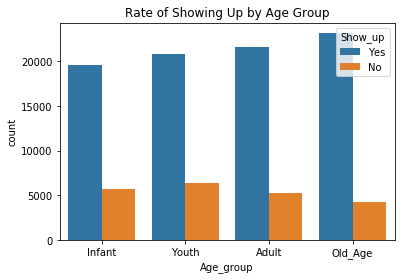

In [37]:
#Rate of showing up by Age group
plot_count(col='Age_group', title='Rate of Showing Up by Age Group')

As the age of patients increases they tend to show up more. Patients in the Age groups of Adult and Old_Age show up more.

### Neighbourhood

In [38]:
#top 5 neighbourhood with patients
neigh_ind = df['Neighbourhood'].value_counts()[:5].index

In [39]:
#top 5 neighbourhood patients counts
neigh_score = df['Neighbourhood'].value_counts()[:5].values

neigh_score

array([7717, 5805, 4431, 3877, 3514])

In [40]:
#the top 5 neighbourhood with percentage of Show_up
top_percent = (Yes_show.query('Neighbourhood in @neigh_ind')['Neighbourhood'].value_counts()
       / neigh_score).sort_values(ascending = False)

top_percent

JARDIM DA PENHA    0.837245
JARDIM CAMBURI     0.810159
RESISTÊNCIA        0.795531
MARIA ORTIZ        0.790009
ITARARÉ            0.737336
Name: Neighbourhood, dtype: float64

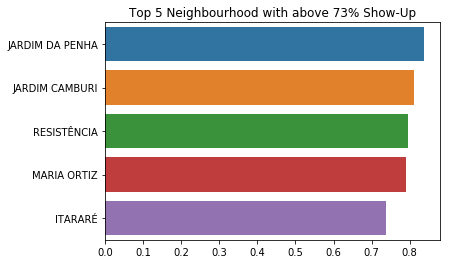

In [41]:
# plotting a barplot
sns.barplot(y= top_percent.index, x = top_percent.values, orient = 'h')
plt.title("Top 5 Neighbourhood with above 73% Show-Up");

Patients in neighbourhood of `JARDIM CAMBURI`, `MARIA ORTIZ`, `RESISTÊNCIA`, `JARDIM DA PENHA` and `ITARARÉ` with appointment above 3500 are 73% likely to Show-up.

### Appointment Day

In [42]:
#extracting the day of appointment
Yes_show['day'] = Yes_show['AppointmentDay'].dt.day
No_show['day'] = No_show['AppointmentDay'].dt.day

In [43]:
#number of unique days of appointment
df['AppointmentDay'].dt.day.nunique()

24

In [44]:
#number of unique days of Schedule
df['ScheduledDay'].dt.day.nunique()

31

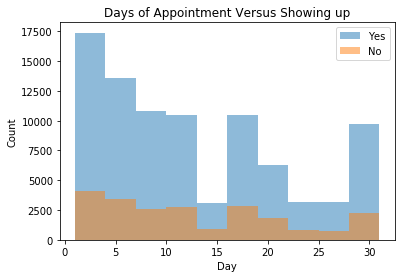

In [45]:
#plotting Days of Appointment vs Showing up
plot_hist(col='day', title = 'Days of Appointment Versus Showing up')

Appointment that falls in the first week of the month has a higher chance of Show Up compared to middle of the Month. Day 1 to 5 of the month has the highest Yes Show up

### SMS Received

In [46]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

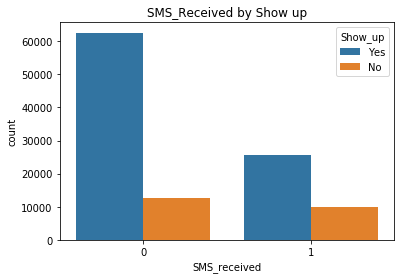

In [47]:
#countplot of Sms_received by Show-up
plot_count(col = 'SMS_received', title = 'SMS_Received by Show up')

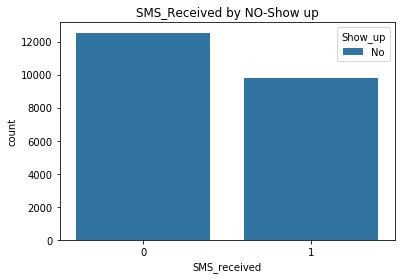

In [48]:
plot_count(col ='SMS_received', data=No_show, title='SMS_Received by NO-Show up')

More than half of the population did not recieve SMS. From the analysis receiving sms does not have effect on showing up

## Which Top 5 neighbourhoods as highest No-show?

Getting the proportion of top 5 Neighbourhood with No_show

In [49]:
# proporttion of No-show
top_NoShow = (No_show['Neighbourhood'].value_counts() / 
              df['Neighbourhood'].value_counts()).sort_values(ascending = False)[:5]

top_NoShow

ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
Name: Neighbourhood, dtype: float64

The real number of count for each neighborhood in the top 5

In [50]:
real_count = df['Neighbourhood'].value_counts()[top_NoShow.index]
top_NoShow_count = No_show['Neighbourhood'].value_counts()[top_NoShow.index]

real_count

ILHAS OCEÂNICAS DE TRINDADE       2
SANTOS DUMONT                  1276
SANTA CECÍLIA                   448
SANTA CLARA                     506
ITARARÉ                        3514
Name: Neighbourhood, dtype: int64

In [51]:
top_NoShow_count

ILHAS OCEÂNICAS DE TRINDADE      2
SANTOS DUMONT                  369
SANTA CECÍLIA                  123
SANTA CLARA                    134
ITARARÉ                        923
Name: Neighbourhood, dtype: int64

Plotting the horizontal bar of Total count against Count of No-Show Up

In [52]:
#locations of the neighborhood
ind = np.arange(5)

# the width of bars
width = 0.35

ind

array([0, 1, 2, 3, 4])

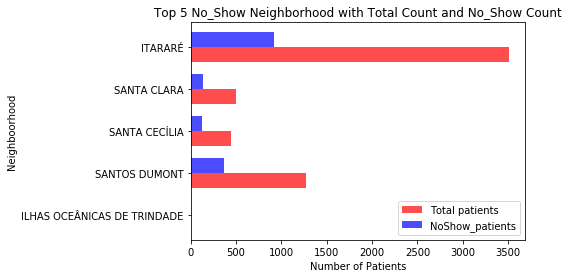

In [53]:
#plot bars
real_count_bars = plt.barh(ind, real_count, width, color='r',alpha = 0.7,label = 'Total patients')
NoShow_count_bars = plt.barh(ind + width, top_NoShow_count, width, alpha = 0.7, color = 'b', label = 'NoShow_patients')

#title and labels
plt.ylabel('Neighboorhood')
plt.xlabel('Number of Patients')
plt.title('Top 5 No_Show Neighborhood with Total Count and No_Show Count')
locations = ind + width / 2 #xticks location
plt.yticks(locations, top_NoShow.index)

#legend
plt.legend(loc = 4);

There is above 25% that patients from `ILHAS OCEÂNICAS DE TRINDADE`, `SANTOS DUMONT`, `SANTA CECÍLIA`, `SANTA CLARA`, `ITARARÉ` will miss the appointment

## What is the likelihood of younger people Not Show-Up?

The likelihood is the number of younger patients who missed over total number of patients who missed

In [54]:
df['Age_group'].unique()

[Old_Age, Infant, Youth, Adult, NaN]
Categories (4, object): [Infant < Youth < Adult < Old_Age]

In [55]:
#Younger patients will be Youth and Infant
young_No_Show = df.query('Age_group in ("Infant", "Youth") & Show_up == "No"')

In [56]:
#likelihood of young patients Not show
len(young_No_Show) / len(No_show)

0.5431246919664859

There is a 54% likelihood that a young patients will not show up

## Is there any relationship between age and ailments?

### Hypertension

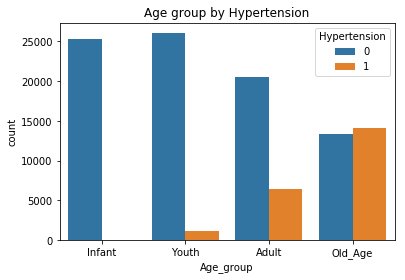

In [57]:
#ploting age by hypertension
plot_count(col='Age_group', hue_col='Hypertension', title='Age group by Hypertension')

### Diabetes

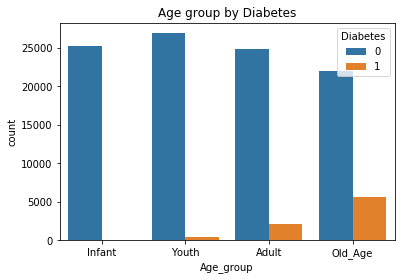

In [58]:
#ploting age by diabetes
plot_count(col='Age_group', hue_col='Diabetes', title='Age group by Diabetes')

### Handicap

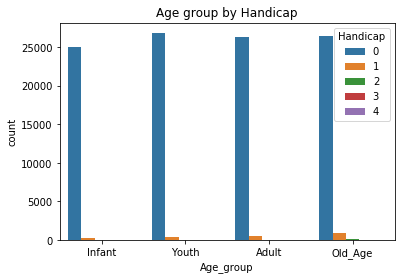

In [59]:
#ploting age by handicap
plot_count(col='Age_group', hue_col='Handicap', title='Age group by Handicap')

`Hypertension` and `Diabetes` are common among the youth adult and Old age with more cases at the Old age. `Handicap` is common to all age group with less percentage for Infant and more for Old age

<a id='conclusions'></a>
## Conclusions

From the analysis, it was discovered that gender, age, neighborhood, and Day of appointment are important to predict if a patient will show up. It was discovered that more Females are likely to Show-Up than Male, although the data is imbalanced towards gender having more Females than Male.

The Age group of Infant and Old Age also Shows-Up more for Appointment compared to other groups. The young patients comprising the Infant and Youth Age group have a 54% likelihood of not Showing Up.

Some Neighborhoods show a record of regular Showing Up while some Neighborhood like SANTOS DUMONT has low patients Showing Up. This can be to so many reasons that can be further researched like closeness and accessibility to the hospital.

It was also seen that patients show up more if the Appointment Day is within the first 10 days of the month compared to the middle of the Month. Also, SMS Received by patients has little or no effect on Showing Up, this conclusion is limited because the majority of patients did not receive SMS.

Further analysis shows that cases of Hypertension and Diabetes increase from Youth to Old Age while Handicap is common to all but more for the Old Age.

#### LIMITATIONS: 
* During the analysis a negative value of age was identified as an outlier which was dropped. Having domain knowledge about the data might have helped to understand why this was so or if it was a mistake.

* The `SMS_received` was highly imbalanced and the relationship with Showing up may not be considered.

* Data about the population or closeness of a Neighboorhood to the hospital would help to further analyse the cause.

* Having data about the reason for the appointment might help to know why some eventually not show up.

## Submitting your Project 

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0